# Detecting Underfitting and Overfitting with Polynomial Regression

In this project, we'll explore how changing a model's complexity impacts its performance.
We'll use **Polynomial Regression** to fit the **California Housing dataset**, and analyze:

- What is **underfitting** and **overfitting**
- How to use **learning curves** to diagnose problems
- How to choose the right **model complexity**
- Why **evaluation metrics** matter

This is a beginner-friendly, fully documented project that aims to make core ML concepts easy to understand and apply.

## Step 1: Project Setup and Imports

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Step 2: Load and Prepare the Dataset

### Dataset: California Housing

We are using the **California Housing dataset**, which contains information about housing prices in California districts.

Each row represents a district with the following features:

- `MedInc`: Median income in block
- `HouseAge`: Median house age
- `AveRooms`: Average number of rooms
- `AveOccup`: Average house occupancy
- `Latitude`, `Longitude`: Location data
- `MedHouseVal`: Target variable (median house value)

To simplify the problem and visualize it easily, we'll focus on a **single feature** — `MedInc` (Median Income) — to predict `MedHouseVal` (Median House Value).


In [2]:
# Load the California Housing dataset
dataset = fetch_california_housing(as_frame=True)
df = dataset.frame

# Quick preview
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Step 3: Select Features and Split Data
### Data Splitting

We split the dataset into:

- **Training Set** (80%) – used to train the model
- **Validation Set** (20%) – used to evaluate generalization performance

We focus on a **simple 1-feature regression** (median income → house value) so we can clearly observe how complexity affects performance.

In [3]:
# Define feature and target\
X = df[['MedInc']].values
y = df['MedHouseVal'].values

# Split dataset into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Model Training and Error Plotting

### Model Complexity: Polynomial Degree 1 to 15

We now train **polynomial regression models** with degrees from 1 to 15.
<br/><br/>
#### How Polynomial Regression Works (Beginner Explanation)
- Linear Regression fits a straight line (e.g. y = a + bx)
- Polynomial Regression fits curved lines like:
  - Degree 2: `y = a + bx + cx²`
  - Degree 3: `y = a + bx + cx² + dx³`

The higher the degree, the more complex the model — but complexity isn’t always good!

For each degree:
- We fit the model to the training set
- Measure the **RMSE** (Root Mean Squared Error) on both training and validation sets

We then plot:
- **Training Error Curve** (red)
- **Validation Error Curve** (blue)

These curves help us visually detect:
- **Underfitting**: Both errors high (left side of plot)
- **Overfitting**: Validation error increases while training error decreases (right side)
- **Good Fit**: Validation error is lowest (sweet spot in the middle)

### 4.1 Training Polynomial Regression Models

In this step, we train multiple polynomial regression models with increasing degrees of complexity.

By fitting models from degree 1 up to degree 15, we can observe how the model's performance changes as we increase the capacity to fit more complex patterns in the data.

We'll evaluate each model using:
- **Training error**: How well the model fits the data it was trained on
- **Validation error**: How well the model generalizes to unseen data

These results help us identify:
- When the model is too simple (**underfitting**)
- When it becomes too complex (**overfitting**)
- And where it performs best (**optimal complexity**)

This process is the foundation for selecting a model that balances bias and variance effectively.

In [4]:
def evaluate_polynomial_models(X_train, y_train, X_val, y_val, max_degree=15):
    """
    Trains polynomial regression models for degrees 1 to max_degree,
    and returns the models, their training RMSEs, and validation RMSEs.

    Parameters
    ----------
    X_train, y_train : array-like
        Training feature matrix and labels.
    X_val, y_val : array-like
        Validation feature matrix and labels.
    max_degree : int
        The maximum polynomial degree to consider.

    Returns
    -------
    models : list
        Trained models for each polynomial degree.

    train_errors : list of float
        Training RMSE for each degree.

    val_errors : list of float
        Validation RMSE for each degree.
    """
    models = []
    train_errors = []
    val_errors = []

    for degree in range(1, max_degree + 1):
        model = make_pipeline(
            PolynomialFeatures(degree=degree, include_bias=False),
            StandardScaler(),
            LinearRegression()
        )
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

        models.append(model)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    return models, train_errors, val_errors


### 4.2 Plotting Model Complexity vs Error

After training polynomial regression models of increasing complexity, we now plot how the model's **training and validation error** changes with each polynomial degree.

This helps us:
- Visualize how model complexity impacts performance
- Identify regions of **underfitting** (both errors high)
- Detect **overfitting** (training error low, validation error high)
- Find the **optimal degree** with the lowest validation error

The goal is to select a model that performs well on both training and unseen data — a key principle in building generalizable machine learning systems.


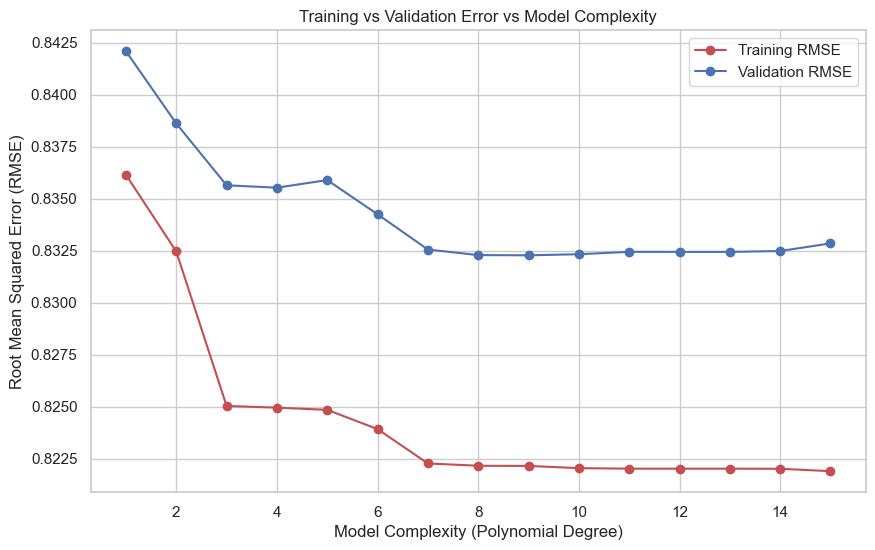

In [5]:
def plot_model_complexity(X_train, y_train, X_val, y_val, max_degree=15):
    """
    Plots training and validation RMSE for polynomial regression models
    of increasing complexity (degree 1 to max_degree).

    This function helps visualize how model complexity affects performance,
    and is useful for detecting underfitting and overfitting using error curves.

    Parameters
    ----------
    X_train : array-like of shape (n_samples, 1)
        Feature matrix for the training data.

    y_train : array-like of shape (n_samples,)
        Target values for the training data.

    X_val : array-like of shape (n_samples, 1)
        Feature matrix for the validation data.

    y_val : array-like of shape (n_samples,)
        Target values for the validation data.

    max_degree : int, default=15
        The maximum polynomial degree to evaluate.

    Returns
    -------
    None
        Displays a plot showing training and validation RMSE as a function of model complexity.
    """
    _, train_errors, val_errors = evaluate_polynomial_models(X_train, y_train, X_val, y_val, max_degree)
    degrees = range(1, max_degree + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(degrees, train_errors, "r-o", label="Training RMSE")
    plt.plot(degrees, val_errors, "b-o", label="Validation RMSE")
    plt.xlabel("Model Complexity (Polynomial Degree)")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.title("Training vs Validation Error vs Model Complexity")
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot training vs validation error for polynomial degrees 1 to 15
plot_model_complexity(X_train, y_train, X_val, y_val, max_degree=15)

## Step 5: Best Model Selection and Prediction Visualization

Now that we've analyzed model performance across polynomial degrees, it's time to:

1. Select the **best model** — the one with the lowest validation RMSE.
2. Retrain it using the training set.
3. Visualize the model's predicted curve against both:
   - Training data
   - Validation data

This helps us visually confirm:
- How well the selected model fits the pattern
- Whether it overfits or generalizes well

By overlaying the prediction curve on the data points, we can interpret how the model behaves in real input space.

Best polynomial degree: 9
Validation RMSE at best degree: 0.8323


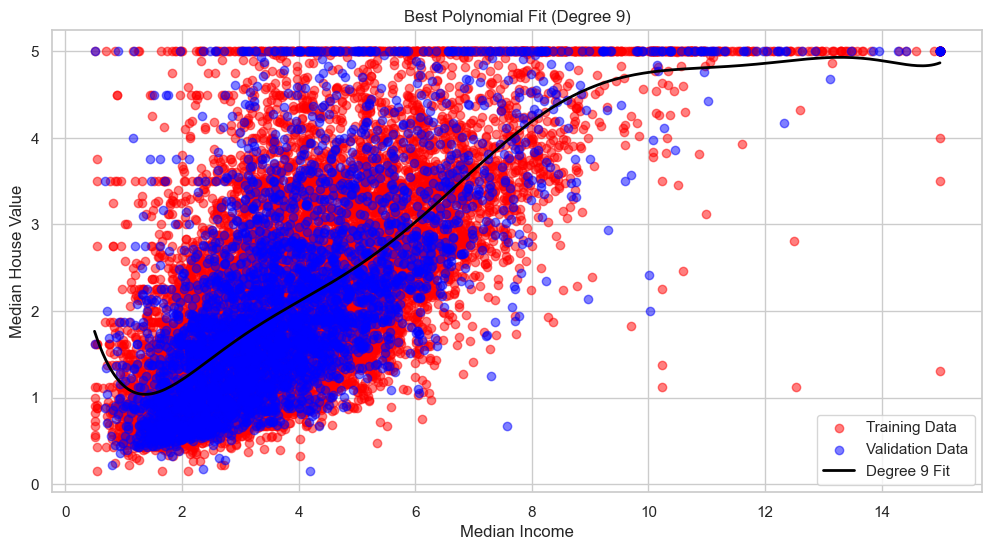

In [6]:
def visualize_best_model(X_train, y_train, X_val, y_val, max_degree=15):
    """
    Selects the best polynomial regression model (based on validation RMSE),
    retrains it on the training data, and visualizes its predictions
    over a smooth input range along with actual training and validation points.

    Parameters
    ----------
    X_train : array-like of shape (n_samples, 1)
        Feature matrix for the training set.

    y_train : array-like of shape (n_samples,)
        Target values for the training set.

    X_val : array-like of shape (n_samples, 1)
        Feature matrix for the validation set.

    y_val : array-like of shape (n_samples,)
        Target values for the validation set.

    max_degree : int, default=15
        Maximum polynomial degree to evaluate when selecting the best model.

    Returns
    -------
    None
        Displays a scatter plot of actual data and the prediction curve from the best-fit model.
    """
    # Train all polynomial models and get errors
    models, train_errors, val_errors = evaluate_polynomial_models(X_train, y_train, X_val, y_val, max_degree)

    # Select best model
    best_index = np.argmin(val_errors)
    best_model = models[best_index]
    best_degree = best_index + 1

    print(f"Best polynomial degree: {best_degree}")
    print(f"Validation RMSE at best degree: {val_errors[best_index]:.4f}")

    # Create a smooth range of values for plotting the prediction curve
    X_range = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)
    y_pred_curve = best_model.predict(X_range)

    # Plot actual points and model prediction curve
    plt.figure(figsize=(12, 6))
    plt.scatter(X_train, y_train, color="red", alpha=0.5, label="Training Data")
    plt.scatter(X_val, y_val, color="blue", alpha=0.5, label="Validation Data")
    plt.plot(X_range, y_pred_curve, color="black", linewidth=2, label=f"Degree {best_degree} Fit")
    plt.xlabel("Median Income")
    plt.ylabel("Median House Value")
    plt.title(f"Best Polynomial Fit (Degree {best_degree})")
    plt.legend()
    plt.grid(True)
    plt.show()


# Select and visualize the best polynomial regression model
visualize_best_model(X_train, y_train, X_val, y_val, max_degree=15)

## Project Summary

In this project, we explored how model complexity affects the performance of a machine learning model by applying **Polynomial Regression** to the **California Housing dataset**.

### Goal
To understand and visualize how changing the **polynomial degree** (model complexity) impacts:
- Training error
- Validation error
- Generalization to unseen data

### Dataset Used
- **California Housing Dataset** from `scikit-learn`
- Predicting `MedHouseVal` (median house value) from a single feature: `MedInc` (median income)

### Key Steps Performed

1. **Data Preparation**
   - Loaded the dataset using `fetch_california_housing()`
   - Selected a single feature for interpretability
   - Split the data into training and validation sets

2. **Model Training**
   - Trained polynomial regression models with degrees ranging from 1 to 15
   - Used pipelines to automate polynomial feature expansion and standard scaling

3. **Model Evaluation**
   - Plotted **training vs validation RMSE** to understand:
     - Underfitting (both errors high)
     - Overfitting (training error low, validation error high)
   - Selected the best model based on **lowest validation error**

4. **Model Visualization**
   - Plotted the prediction curve of the best model against the actual training and validation points
   - Confirmed whether the model generalized well visually

### Insights Learned

- **Low-degree models** (e.g., degree 1) tend to underfit — they’re too simple to capture patterns.
- **High-degree models** (e.g., degree 12+) tend to overfit — they memorize training data but perform poorly on unseen data.
- There’s an **optimal degree** that balances bias and variance — and gives the lowest validation error.
- Learning curves are powerful tools for detecting underfitting and overfitting.

### Key Concepts Demonstrated

- Polynomial regression
- Model complexity control
- Underfitting vs overfitting
- Training vs validation error analysis
- RMSE as a regression evaluation metric
- Visualization of model performance

